<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Images/Visualizing%20Convolutional%20Neural%20Network%20Layers/Vizualizing_Conv_Layers_for_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 380.8MB 47kB/s 
     |████████████████████████████████| 3.8MB 29.3MB/s 
     |████████████████████████████████| 450kB 51.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [92]:
y_train.shape

(50000, 1)

In [0]:
X_train, X_test = X_train.reshape(50000,32,32,3) / 255.0, X_test.reshape(10000,32,32,3) / 255.0

In [95]:
X_train.shape

(50000, 32, 32, 3)

In [96]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=X_train.shape[1:]),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [103]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [104]:
model.fit(X_train, y_train, batch_size=512,epochs=20,verbose=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 4s 105us/sample - loss: 1.8424 - accuracy: 0.3232 - val_loss: 1.6061 - val_accuracy: 0.4054
Epoch 2/20
40000/40000 [==============================] - 3s 77us/sample - loss: 1.4657 - accuracy: 0.4641 - val_loss: 1.4648 - val_accuracy: 0.4534
Epoch 3/20
40000/40000 [==============================] - 3s 78us/sample - loss: 1.2993 - accuracy: 0.5305 - val_loss: 1.2869 - val_accuracy: 0.5348
Epoch 4/20
40000/40000 [==============================] - 3s 77us/sample - loss: 1.1910 - accuracy: 0.5745 - val_loss: 1.1872 - val_accuracy: 0.5820
Epoch 5/20
40000/40000 [==============================] - 3s 79us/sample - loss: 1.0896 - accuracy: 0.6138 - val_loss: 1.1726 - val_accuracy: 0.5815
Epoch 6/20
40000/40000 [==============================] - 3s 77us/sample - loss: 1.0188 - accuracy: 0.6401 - val_loss: 1.1232 - val_accuracy: 0.6070
Epoch 7/20
40000/40000 [==============================]

In [105]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 1s - loss: 1.0086 - accuracy: 0.7047


[0.9989368481636047, 0.7047]

### Vizualizing intermediate representations

In [0]:
sucessive_outputs = [layer.output for layer in model.layers[1:]]

In [107]:
sucessive_outputs

[<tf.Tensor 'max_pooling2d_15/Identity:0' shape=(None, 15, 15, 32) dtype=float32>,
 <tf.Tensor 'conv2d_16/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_16/Identity:0' shape=(None, 6, 6, 64) dtype=float32>,
 <tf.Tensor 'conv2d_17/Identity:0' shape=(None, 4, 4, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_17/Identity:0' shape=(None, 2, 2, 128) dtype=float32>,
 <tf.Tensor 'flatten_5/Identity:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense_10/Identity:0' shape=(None, 1024) dtype=float32>,
 <tf.Tensor 'dense_11/Identity:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense_12/Identity:0' shape=(None, 10) dtype=float32>]

In [0]:
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = sucessive_outputs)

In [109]:
visualization_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15_input (InputLayer) [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 128)         0   

In [110]:
x = X_test[0]
x = x.reshape((1,) + x.shape)
print(x.shape)

(1, 32, 32, 3)


In [0]:
successive_feature_maps = visualization_model.predict(x)

In [0]:
layer_names = [layer.name for layer in model.layers]

In [113]:
for ln, sfm in zip(layer_names,successive_feature_maps):
    print("\r",ln,":",sfm.shape)

 conv2d_15 : (1, 15, 15, 32)
 max_pooling2d_15 : (1, 13, 13, 64)
 conv2d_16 : (1, 6, 6, 64)
 max_pooling2d_16 : (1, 4, 4, 128)
 conv2d_17 : (1, 2, 2, 128)
 max_pooling2d_17 : (1, 512)
 flatten_5 : (1, 1024)
 dense_10 : (1, 512)
 dense_11 : (1, 10)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import numpy as np

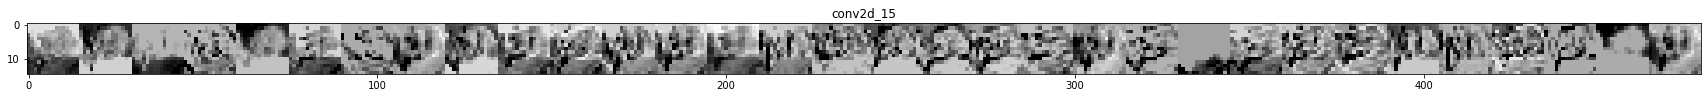

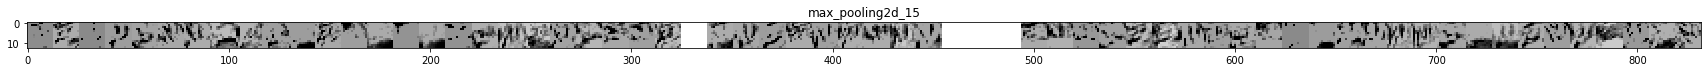

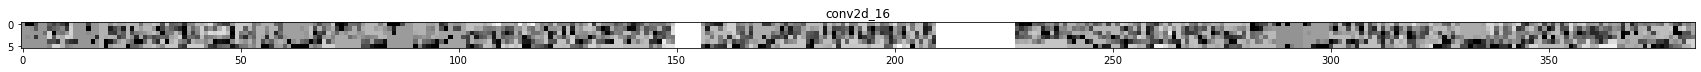

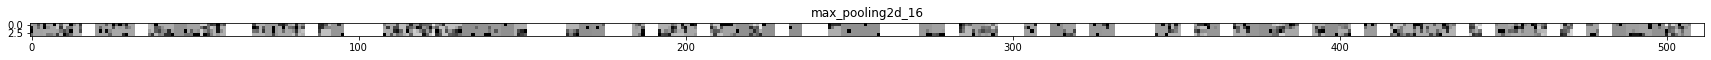

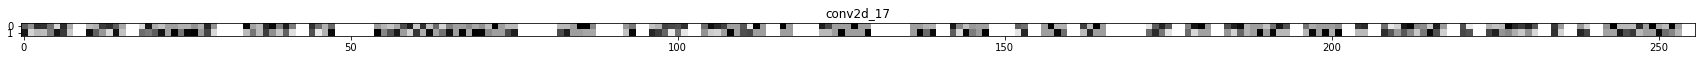

In [118]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape)==4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]

        display_grid = np.zeros((size, size*n_features))

        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:,i*size : (i+1)*size] = x
        scale = 30./ n_features
        plt.figure(figsize=(scale*n_features,scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid,cmap=plt.cm.binary,aspect='auto')
        plt.show()

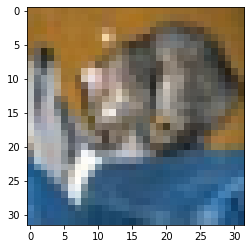

In [120]:
plt.imshow(X_test[0])